**TASK-4**
# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.



INSTALLING KAGGLE

In [ ]:
!pip install kaggle

INSTALLING KERAS LIBRARY

In [ ]:
!pip install keras

IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:36<00:00, 112MB/s]
100% 2.13G/2.13G [00:36<00:00, 62.6MB/s]


In [ ]:
! unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

IMPORTING LIBRARIES

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import random
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path='/content/leapGestRecog'

#### Loading the images and their class(0 - 9)

In [ ]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 4, 5, ..., 2, 4, 3],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 4, 5, ..., 3, 3, 4],
        ...,
        [5, 5, 5, ..., 3, 4, 4],
        [5, 4, 4, ..., 3, 3, 4],
        [5, 3, 5, ..., 2, 4, 4]], dtype=uint8),
 0]

Data Preprocessing

In [ ]:
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


In [ ]:
label[:10]

[7, 9, 9, 5, 1, 7, 6, 4, 1, 9]

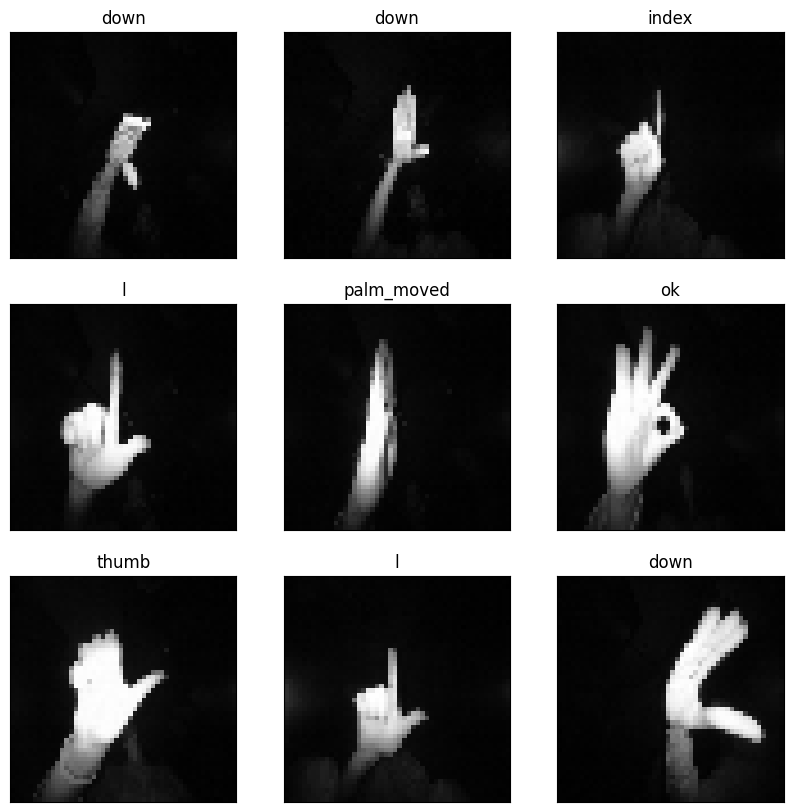

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

#CNN MODEL

In [ ]:
import keras
from keras.utils import to_categorical
label = to_categorical(label)

In [ ]:
#reshape
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label,test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 50, 50, 1)
(4000, 50, 50, 1)
(16000, 10)
(4000, 10)


In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs =5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 120s 237ms/step - accuracy: 0.8065 - loss: 0.6083 - val_accuracy: 0.9970 - val_loss: 0.0085
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 232ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9990 - val_loss: 0.0047
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 122s 243ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 240ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9992 - val_loss: 0.0015
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 231ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9975 - val_loss: 0.0123


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,333,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,037,888 (49.74 MB)

 Trainable params: 4,345,962 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,691,926 (33.16 MB)

Evaluation and Performance

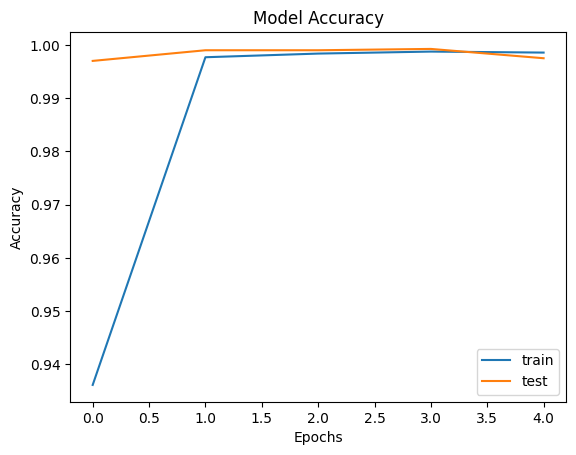

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9955 - loss: 0.0191
Test accuracy: 99.75%
